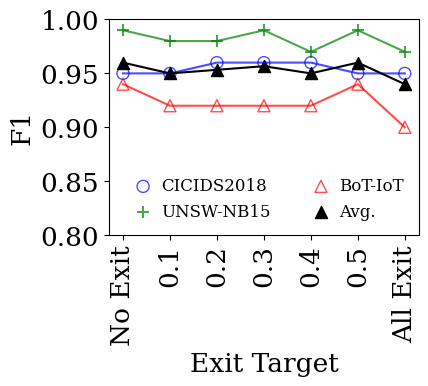

In [5]:
import matplotlib.pyplot as plt

labels = [
    "No Exit",
    "0.1", "0.2", "0.3", "0.4", "0.5",
    "All Exit"
]

qtd_elementos = len(labels)

valores_lista_bot = [0.94, 0.92, 0.92, 0.92, 0.92, 0.94, 0.90]

valores_lista_unsw = [0.99, 0.98, 0.98, 0.99, 0.97, 0.99, 0.97]

valores_lista_cic = [0.95, 0.95, 0.96, 0.96, 0.96, 0.95, 0.95]

valores_avg = [(a + b + c) / 3 for a, b, c in zip(valores_lista_bot, valores_lista_unsw, valores_lista_cic)]



x_indices = range(qtd_elementos)

plt.figure(figsize=(4, 3.5*0.8))

plt.rcParams['font.family'] = 'serif'

plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.rcParams.update({'font.size': 19})


plt.scatter(x_indices, valores_lista_cic, marker='o', color='blue', label='CICIDS2018', s=75, facecolors='none', alpha=0.7)
plt.scatter(x_indices, valores_lista_unsw, marker='+', color='green', label='UNSW-NB15', s=75, alpha=0.7)
plt.scatter(x_indices, valores_lista_bot, marker='^', color='red', label='BoT-IoT', s=75, facecolors='none', alpha=0.7)
plt.scatter(x_indices, valores_avg, marker='^', color='black', label='Avg.', s=75)



plt.plot(x_indices, valores_lista_cic, color='blue', linestyle='-', alpha=0.7)
plt.plot(x_indices, valores_lista_unsw, color='green', linestyle='-', alpha=0.7)
plt.plot(x_indices, valores_lista_bot, color='red', linestyle='-', alpha=0.7)
plt.plot(x_indices, valores_avg, color='black', linestyle='-')

plt.xticks(ticks=x_indices, labels=labels, rotation=90)

plt.ylabel('F1')

plt.xlabel('Exit Target')

plt.ylim(0.8, 1)
plt.grid(False)

plt.legend(frameon=False, loc='lower right', fontsize=12, handletextpad=0.1, ncol=2)
plt.savefig('graficos/compacuracia.pdf', bbox_inches='tight', pad_inches=0.02)

plt.show()

[0.05383333333333334, 0.0529, 0.05153333333333334, 0.048966666666666665, 0.04703666666666667, 0.0452, 0.03646666666666667]


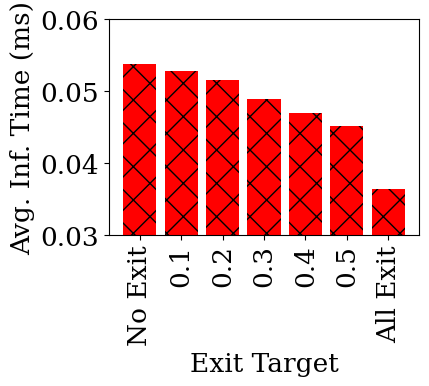

In [9]:
inf_time_ms_bot = [0.0570, 0.0570, 0.0553, 0.0506, 0.0495, 0.0491, 0.0366]
inf_time_ms_cic = [0.0521, 0.0521, 0.0513, 0.049, 0.04801, 0.0457, 0.0366]
inf_time_ms_unsw = [0.0524, 0.0496, 0.0480, 0.0473, 0.0436, 0.0408, 0.0362]

avg_inf_time_ms = [(a + b + c) / 3 for a, b, c in zip(inf_time_ms_bot, inf_time_ms_cic, inf_time_ms_unsw)]
print(avg_inf_time_ms)

x_indices = range(len(avg_inf_time_ms))

plt.figure(figsize=(4, 3.5*0.8))

plt.rcParams['font.family'] = 'serif'

plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

plt.rcParams.update({'font.size': 19})

plt.bar(labels, avg_inf_time_ms, hatch='x', color='red')

plt.xticks(rotation=90)
plt.xlabel('Exit Target')


plt.ylabel('Avg. Inf. Time (ms)')

plt.ylim(0.03, 0.06)
plt.grid(False)

plt.savefig('graficos/compprocessamento.pdf', bbox_inches='tight', pad_inches=0.02)

plt.show()

In [156]:
f1_bot_rc = [0.91, 0.68, 0.71]

avg_f1_bot_rc = sum(f1_bot_rc) / len(f1_bot_rc)

f1_unsw_rc = [0.66, 0.98, 0.57]

avg_f1_unsw_rc = sum(f1_unsw_rc) / len(f1_unsw_rc)

f1_cic_rc = [0.32, 0.66, 0.94]

avg_f1_cic_rc = sum(f1_cic_rc) / len(f1_cic_rc)


f1_bot_cd = [0.92, 0.65, 0.60]

avg_f1_bot_cd = sum(f1_bot_cd) / len(f1_bot_cd)

f1_unsw_cd = [0.66, 0.99, 0.54]

avg_f1_unsw_cd = sum(f1_unsw_cd) / len(f1_unsw_cd)

f1_cic_cd = [0.33 , 0.71, 0.95]

avg_f1_cic_cd = sum(f1_cic_cd) / len(f1_cic_cd)

f1_15_rej = [0.97, 0.99, 0.97]

avg_f1_15_rej = sum(f1_15_rej) / len(f1_15_rej)


inf_time_04 = 0.04703666666666667
inf_time_no_exits = 0.05383333333333334
inf_time_all_exits = 0.03646666666666667

In [181]:
def plot_3(time_trad, time_ours, f1_trad, f1_ours, offset_x, offset_y, filename):
    diff_f1 = f1_ours - f1_trad
    
    diff_time_pct = ((time_ours - time_trad) / time_trad) * 100
    
    sign_f1 = "+" if diff_f1 > 0 else ""
    sign_time = "+" if diff_time_pct > 0 else ""
    
    annotation_text = f"{sign_f1}{diff_f1:.2f} F1\n{sign_time}{diff_time_pct:.0f}% Time"
    
    plt.figure(figsize=(6, 6))
    
    plt.rcParams['font.family'] = 'serif'
    
    plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
    
    plt.rcParams.update({'font.size': 30})
    
    plt.scatter(time_ours, f1_ours, marker='o', color='blue', s=300, label='Ours')
    plt.scatter(time_trad, f1_trad, marker='o', color='blue', facecolors='none', s=300, label='Trad.')
    
    plt.annotate(annotation_text, 
                 (time_ours + offset_x, f1_ours - offset_y), 
                 ha='center')
    
    plt.plot((time_trad, time_ours), (f1_trad, f1_ours), linestyle='--', zorder=0)
    
    plt.xticks(rotation=45)
    plt.xlabel('Proc. Time (ms)')
    
    plt.xlim(0.03, 0.06)
    
    plt.ylabel('Average F1')
    
    plt.ylim(0.5, 1)
    plt.grid(False)
    
    plt.legend(frameon=False, loc='lower right', handletextpad=0.1)
    
    plt.savefig(f'graficos/{filename}.pdf', bbox_inches='tight', pad_inches=0.02)
    
    plt.show()

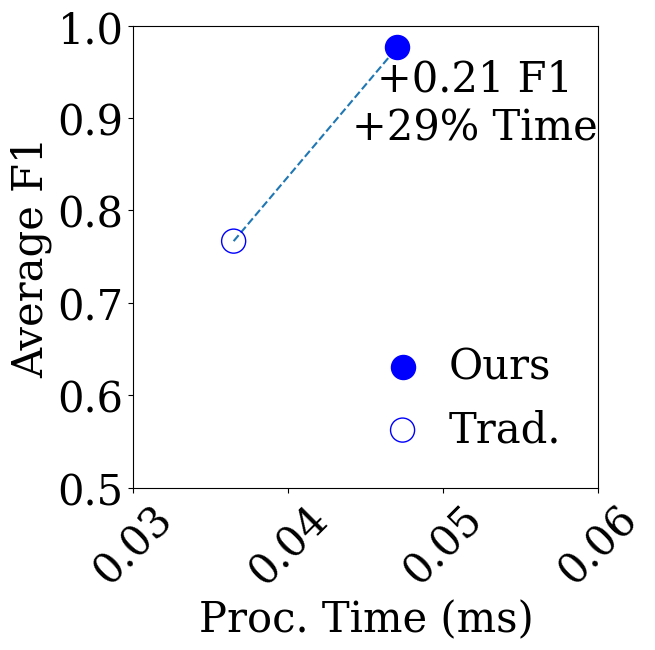

In [182]:
plot_3(inf_time_all_exits, inf_time_04, avg_f1_bot_rc, avg_f1_15_rej, 0.005, 0.1, 'resconstbot')

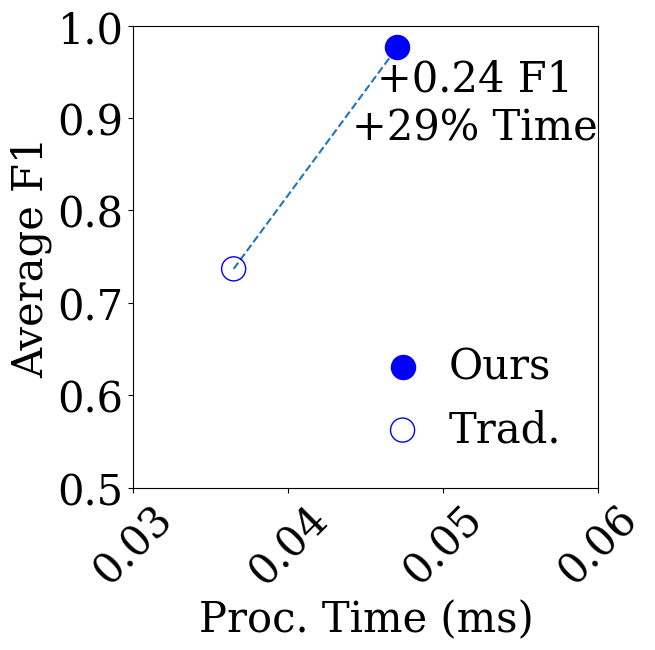

In [183]:
plot_3(inf_time_all_exits, inf_time_04, avg_f1_unsw_rc, avg_f1_15_rej, 0.005, 0.1, 'resconstunsw')

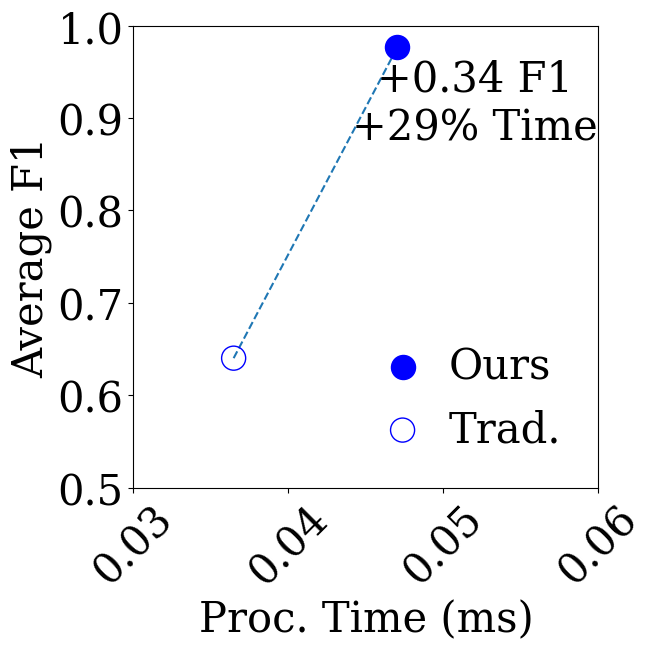

In [184]:
plot_3(inf_time_all_exits, inf_time_04, avg_f1_cic_rc, avg_f1_15_rej, 0.005, 0.1, 'resconstcic')

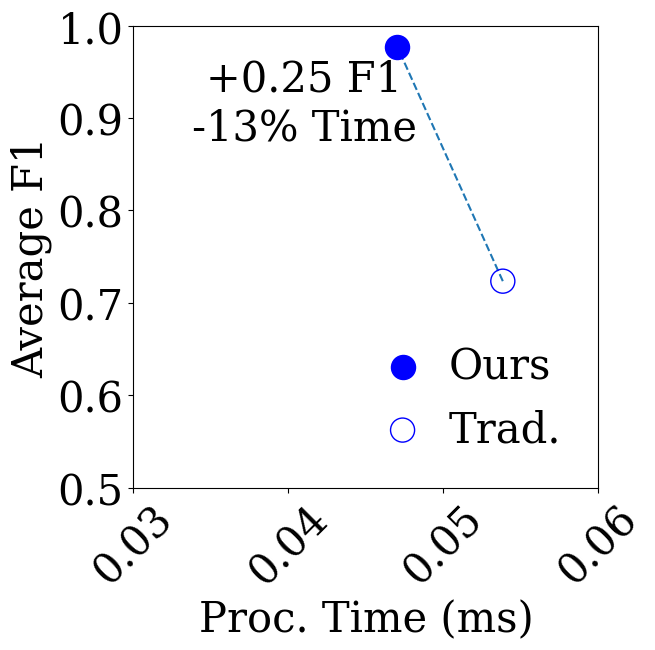

In [185]:
plot_3(inf_time_no_exits, inf_time_04, avg_f1_bot_cd, avg_f1_15_rej, -0.006, 0.1, 'compdembot')

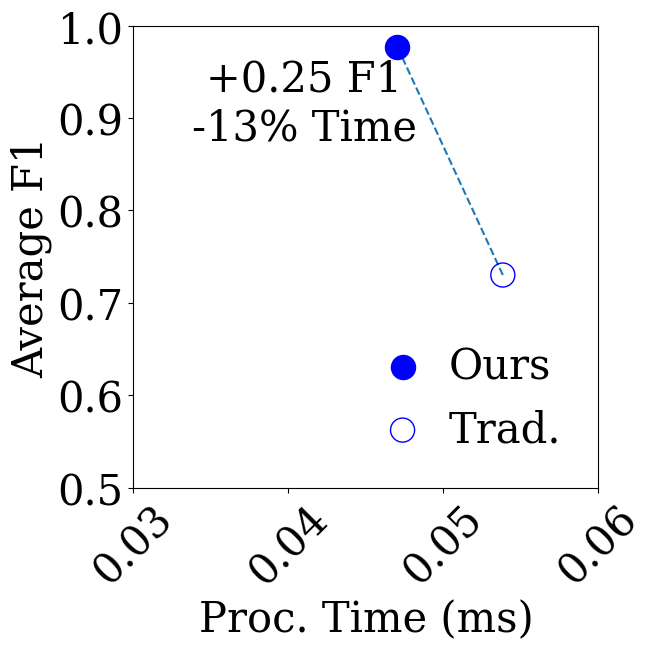

In [186]:
plot_3(inf_time_no_exits, inf_time_04, avg_f1_unsw_cd, avg_f1_15_rej, -0.006, 0.1, 'compdemunsw')

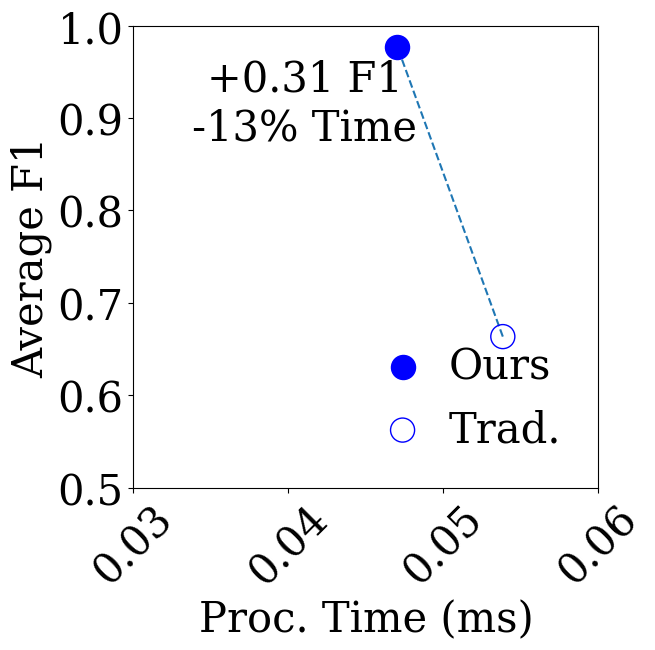

In [187]:
plot_3(inf_time_no_exits, inf_time_04, avg_f1_cic_cd, avg_f1_15_rej, -0.006, 0.1, 'compdemcic')